In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
print("Successfully Imported Necessary Libraries!")

Successfully Imported Necessary Libraries!


In [27]:
df = pd.read_csv("datasets/cleanedAdvanced/overall-teams-data.csv", index_col = "Unnamed: 0")

In [28]:
df.head(1)

,Player,Age,Tkl,TacklesDef3rd,TacklesMid3rd,TacklesAtt3rd,VSDribblesTkl,VSDribblesAtt,VSDribblesTkl%,VSDribblesPast,...,SCADef,GCA,GCA90,GCAPassLive,GCAPassDead,GCADrib,GCASh,GCAFld,GCADef,Points Total
20,Wolves S2,26.6,646,358,227,61,281,685,41.0,404,...,18,83,2.18,53,6,9,8,7,0,59


In [45]:
def scatter_plots_team_player(dataframe, col1, col2, col1string, col2string, title):
    try:
        if col2.min() - 1 > col1.min() - 1:
            min_y = col1.min() - 1
        else:
            min_y = col2.min() - 1

        if col2.max() + 1 < col1.max() + 1:
            max_x = col1.max() + 1
        else:
            max_x = col2.max() + 1
    except:
        print("error")

    plt.figure(figsize=(15, 10))
    sns.scatterplot(x = col1string,
                y = col2string, 
                ci = None,
                data = dataframe)

    x1 = list(col1)
    y1 = list(col2)
    lbl = list(dataframe.Player)
    for i in range(dataframe.shape[0]):
        plt.text(x = x1[i], y = y1[i], s = lbl[i], 
              fontdict = dict(color = "red", size = 8),
              bbox = dict(facecolor = "yellow", alpha = 0.5))

    plt.axline((0, 0), slope = 1)

    #plt.hlines(y=15, xmin=0, xmax=15, colors='r', linestyles='--', lw=2)
    ## keep common scaling for more accurate plot 
    plt.xlim(min_y, max_x)
    plt.ylim(min_y, max_x)
    plt.title(title)
    plt.xlabel(col1string) # x label
    plt.ylabel(col2string) # y label

    plt.show()

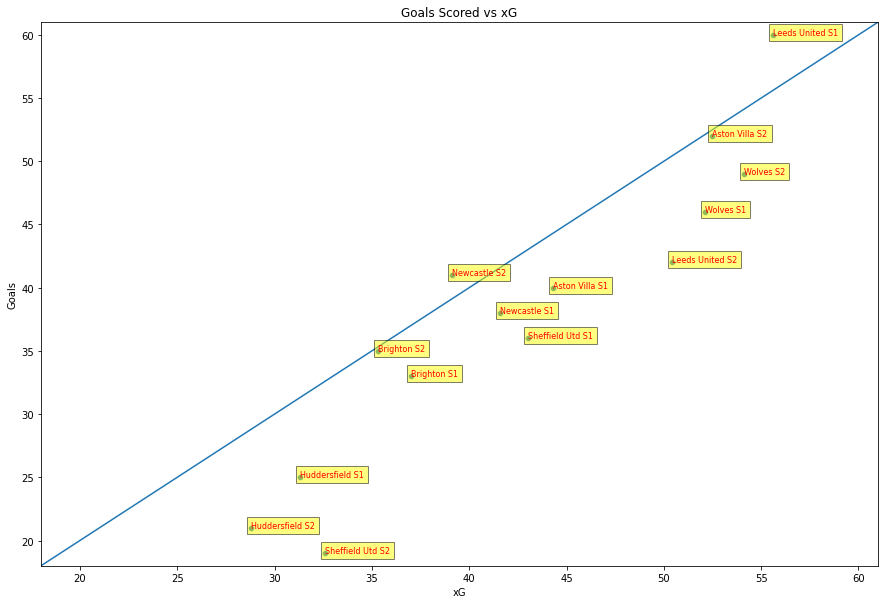

In [5]:
# xg vs actual goals
if df.xG.min() - 1 > df.Gls.min() - 1:
    min_y = df.Gls.min() - 1
else:
    min_y = df.xG.min() - 1
    
if df.xG.max() + 1 < df.Gls.max() + 1:
    max_x = df.Gls.max() + 1
else:
    max_x = df.xG.max() + 1

plt.figure(figsize=(15, 10))
sns.scatterplot(x = "xG",
            y = "Gls", 
            ci = None,
            data = df)

x1 = list(df.xG)
y1 = list(df.Gls)
lbl = list(df.Player)
for i in range(df.shape[0]):
    plt.text(x = x1[i], y = y1[i], s = lbl[i], 
          fontdict = dict(color = "red", size = 8),
          bbox = dict(facecolor = "yellow", alpha = 0.5))

plt.axline((0, 0), slope = 1)
## keep common scaling for more accurate plot 
plt.xlim(min_y, max_x)
plt.ylim(min_y, max_x)
plt.title("Goals Scored vs xG")
plt.xlabel("xG") # x label
plt.ylabel("Goals") # y label

plt.show()

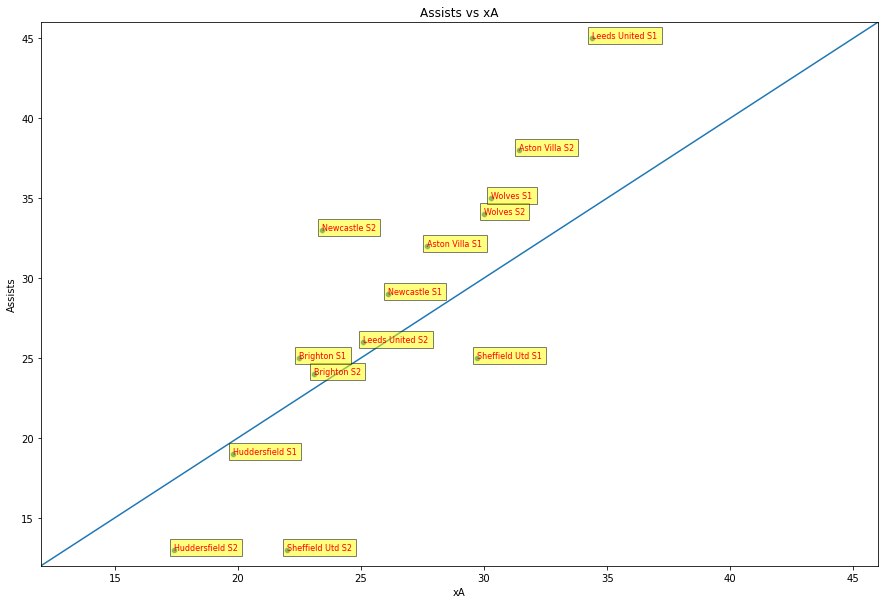

In [6]:
# xa vs assists
### get max for axis
if df.xA.min() - 1 > df.Assists.min() - 1:
    min_y = df.Assists.min() - 1
else:
    min_y = df.xA.min() - 1
    
if df.xA.max() + 1 < df.Assists.max() + 1:
    max_x = df.Assists.max() + 1
else:
    max_x = df.xA.max() + 1

plt.figure(figsize=(15, 10))
sns.scatterplot(x = "xA",
            y = "Assists", 
            ci = None,
            data = df)

x1 = list(df.xA)
y1 = list(df.Assists)
lbl = list(df.Player)
for i in range(df.shape[0]):
    plt.text(x = x1[i], y = y1[i], s = lbl[i], 
          fontdict = dict(color = "red", size = 8),
          bbox = dict(facecolor = "yellow", alpha = 0.5))
plt.axline((0, 0), slope = 1)
## common scaling for more accurate plot
plt.xlim(min_y, max_x)
plt.ylim(min_y, max_x)
plt.title("Assists vs xA") #title
plt.xlabel("xA") #x label
plt.ylabel("Assists") #y label

plt.show()

In [7]:
pens = list(df['PK'])
glls = list(df['Gls'])
non_pen = []
for i in range(len(glls)):
    val = glls[i] - pens[i]
    non_pen.append(val)
    
non_pen

[45, 40, 30, 20, 16, 47, 37, 42, 38, 28, 23, 35, 39, 56]

In [8]:
df['NonPenaltyGoals'] = non_pen

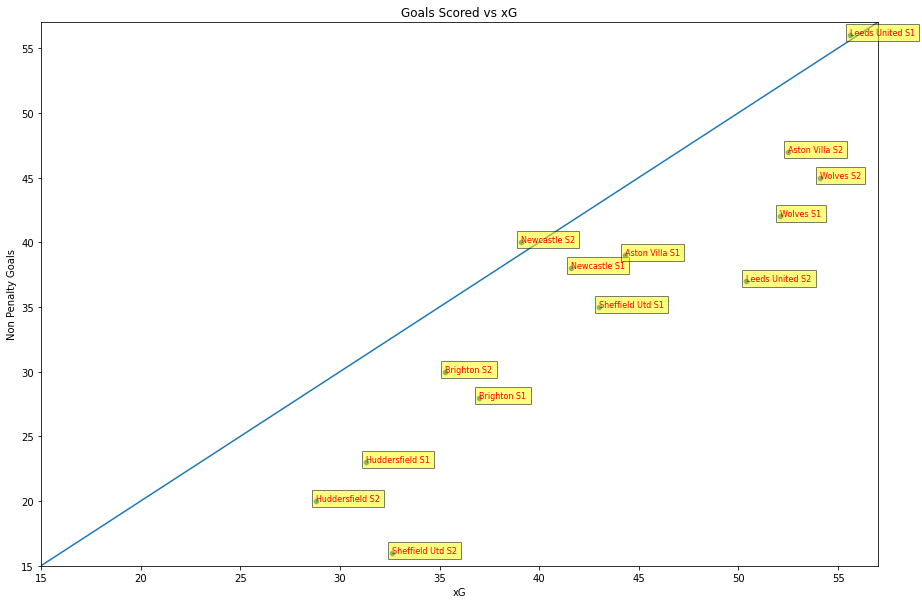

In [9]:
# xg vs non pen actual goals
if df.xG.min() - 1 > df.NonPenaltyGoals.min() - 1:
    min_y = df.NonPenaltyGoals.min() - 1
else:
    min_y = df.xG.min() - 1
    
if df.xG.max() + 1 < df.NonPenaltyGoals.max() + 1:
    max_x = df.NonPenaltyGoals.max() + 1
else:
    max_x = df.xG.max() + 1

plt.figure(figsize=(15, 10))
sns.scatterplot(x = "xG",
            y = "NonPenaltyGoals", 
            ci = None,
            data = df)

x1 = list(df.xG)
y1 = list(df.NonPenaltyGoals)
lbl = list(df.Player)
for i in range(df.shape[0]):
    plt.text(x = x1[i], y = y1[i], s = lbl[i], 
          fontdict = dict(color = "red", size = 8),
          bbox = dict(facecolor = "yellow", alpha = 0.5))

plt.axline((0, 0), slope = 1)
plt.xlim(min_y, max_x)
plt.ylim(min_y, max_x)
plt.title("Goals Scored vs xG") #title
plt.xlabel("xG") #x label
plt.ylabel("Non Penalty Goals") #y label

plt.show()

### Player Level Plots

In [10]:
df1 = pd.read_csv("datasets/cleanedAdvanced/attacking-s1-scatterdata.csv", index_col = "Unnamed: 0")

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 159 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 159 missing from current font.
  font.set_text(s, 0, flags=flags)


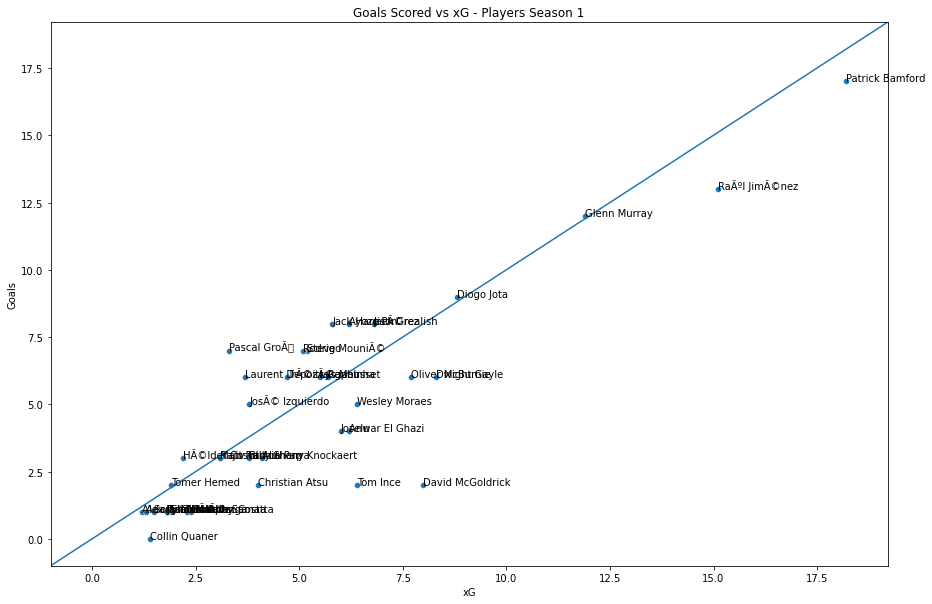

In [51]:
if df1.xG.min() - 1 > df1.Gls.min() - 1:
    min_y = df1.Gls.min() - 1
else:
    min_y = df1.xG.min() - 1
    
if df1.xG.max() + 1 < df1.Gls.max() + 1:
    max_x = df1.Gls.max() + 1
else:
    max_x = df1.xG.max() + 1

plt.figure(figsize=(15, 10))
sns.scatterplot(x = "xG",
            y = "Gls", 
            ci = None,
            data = df1)

x1 = list(df1.xG)
y1 = list(df1.Gls)
lbl = list(df1.Player)
texts = []
for x, y, s in zip(df1.xG, df1.Gls, df1.Player):
    texts.append(plt.text(x, y, s))

plt.axline((0, 0), slope = 1)

#plt.hlines(y=15, xmin=0, xmax=15, colors='r', linestyles='--', lw=2)
## keep common scaling for more accurate plot 
plt.xlim(min_y, max_x)
plt.ylim(min_y, max_x)
plt.title("Goals Scored vs xG - Players Season 1")
plt.xlabel("xG") # x label
plt.ylabel("Goals") # y label

plt.show()

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 159 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 159 missing from current font.
  font.set_text(s, 0, flags=flags)


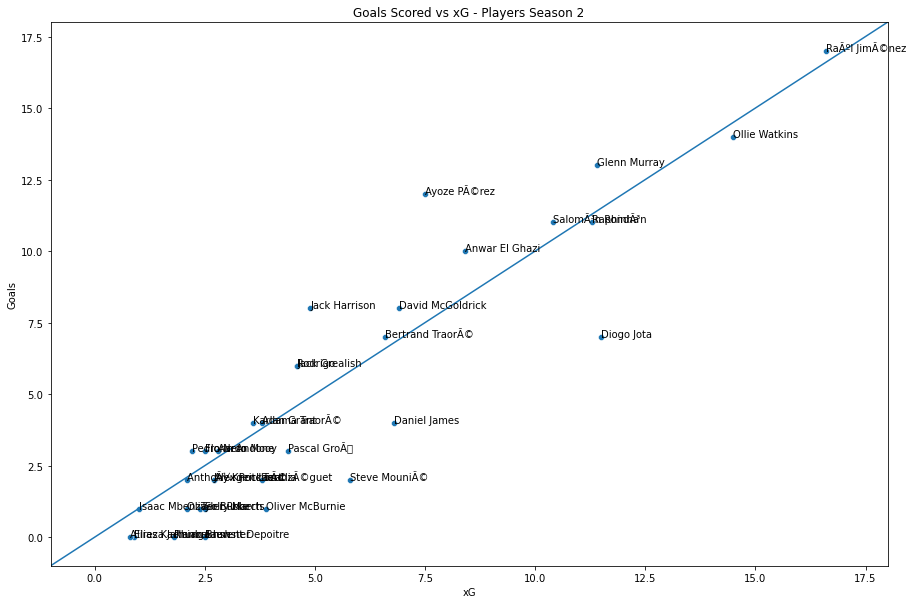

In [50]:
### season 2
df2 = pd.read_csv("datasets/cleanedAdvanced/attacking-s2-scatterdata.csv", index_col = "Unnamed: 0")
if df2.xG.min() - 1 > df2.Gls.min() - 1:
    min_y = df2.Gls.min() - 1
else:
    min_y = df2.xG.min() - 1
    
if df2.xG.max() + 1 < df2.Gls.max() + 1:
    max_x = df2.Gls.max() + 1
else:
    max_x = df2.xG.max() + 1

plt.figure(figsize=(15, 10))
sns.scatterplot(x = "xG",
            y = "Gls", 
            ci = None,
            data = df2)

x1 = list(df2.xG)
y1 = list(df2.Gls)
lbl = list(df2.Player)
texts = []
for x, y, s in zip(df2.xG, df2.Gls, df2.Player):
    texts.append(plt.text(x, y, s))

plt.axline((0, 0), slope = 1)

#plt.hlines(y=15, xmin=0, xmax=15, colors='r', linestyles='--', lw=2)
## keep common scaling for more accurate plot 
plt.xlim(min_y, max_x)
plt.ylim(min_y, max_x)
plt.title("Goals Scored vs xG - Players Season 2")
plt.xlabel("xG") # x label
plt.ylabel("Goals") # y label

plt.show()